## 0. Libarary 불러오기 및 경로설정

In [1]:
import os
import pandas as pd
from PIL import Image

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim

from torchvision import models
from torchvision import transforms
from torchvision.transforms import Resize, ToTensor, Normalize, CenterCrop

In [2]:
train_dir = '/opt/ml/input/data/train'

## 2. Train Dataset 정의

In [3]:
class TrainDataset(Dataset):
    def __init__(self,img_paths,labels,transform):
        self.img_paths = img_paths
        self.labels = labels
        self.transform = transform

    def __getitem__(self,index):
        image = Image.open(self.img_paths[index])
        label = self.labels[index]
        if self.transform:
            image = self.transform(image)
        return image,label

    def __len__(self):
        return len(self.img_paths)

## 3. DataLoader 정의

sample 이미지 살펴보고 transform 결정

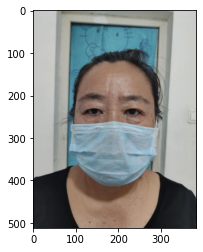

In [5]:
from matplotlib.pyplot import imshow
%matplotlib inline

image = Image.open(image_paths[1225])
imshow(image)


TypeError: Invalid shape (3, 512, 384) for image data

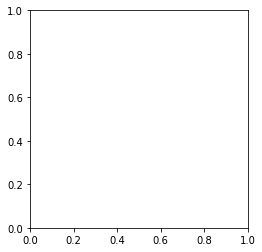

In [11]:
transform = transforms.Compose([
    Resize((512, 384), Image.BILINEAR),
    ToTensor(),
])
image2 = transform(image)
imshow(image2)

In [12]:
# meta 데이터와 이미지 경로를 불러옵니다.
train_info = pd.read_csv(os.path.join(train_dir, 'train2.csv'))
image_paths = train_info['path']
labels = train_info['category']

transform = transforms.Compose([
    CenterCrop(300),
    Resize((224, 224), Image.BILINEAR),
    transforms.RandomHorizontalFlip(),
    ToTensor(),
    Normalize(mean=(0.5, 0.5, 0.5), std=(0.2, 0.2, 0.2)),
])

train_dataset = TrainDataset(image_paths,labels,transform)
#val_dataset = 

train_dataloader = DataLoader(
    train_dataset,
    batch_size=16,
    shuffle=True
)
#val_dataloader = 

## 4. Model 정의

In [13]:
from custom_models import ResnetModel as MyModel

## 5. Train

In [15]:
from sklearn.metrics import f1_score
import numpy as np

# 모델을 정의
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MyModel(num_classes=18).to(device)
model.train()

#hyperparam 정의
num_epoch = 10

#loss function, optimizer 정의
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(),lr=0.01,momentum=0.9)

#모델 학습
from tqdm import tqdm
for epoch in tqdm(range(num_epoch)):
    cur_loss=0.0
    #cur_f1=0.0
    for i,data in enumerate(train_dataloader):
        images,labels = data
        images, labels = images.to(device),labels.to(device)
        
        optimizer.zero_grad()
        
        images.to(device)
        model_output = model(images)
        loss = criterion(model_output,labels)
        loss.backward()
        optimizer.step()
        
        cur_loss += loss.item()
        #model_output = model_output.squeeze().detach().cpu().numpy()
        #predict = np.argmax(model_output)
        #print(labels, predict)
        #cur_f1 += f1_score(labels, model_output) 
        if i%100==99:
            print('[%d,%5d] loss: %.3f'% (epoch+1,i+1,cur_loss/100))
            cur_loss=0.0
            #cur_f1=0.0
            
print('training finished')

  0%|          | 0/10 [00:00<?, ?it/s]

[1,  100] loss: 2.610
[1,  200] loss: 2.540
[1,  300] loss: 2.509
[1,  400] loss: 2.458
[1,  500] loss: 2.422
[1,  600] loss: 2.416
[1,  700] loss: 2.397
[1,  800] loss: 2.366
[1,  900] loss: 2.353
[1, 1000] loss: 2.323
[1, 1100] loss: 2.315


 10%|█         | 1/10 [01:43<15:32, 103.63s/it]

[2,  100] loss: 2.290
[2,  200] loss: 2.298
[2,  300] loss: 2.292
[2,  400] loss: 2.283
[2,  500] loss: 2.281
[2,  600] loss: 2.296
[2,  700] loss: 2.280
[2,  800] loss: 2.290
[2,  900] loss: 2.281
[2, 1000] loss: 2.282
[2, 1100] loss: 2.289


 20%|██        | 2/10 [03:29<13:54, 104.27s/it]

[3,  100] loss: 2.283
[3,  200] loss: 2.268
[3,  300] loss: 2.269
[3,  400] loss: 2.259
[3,  500] loss: 2.272
[3,  600] loss: 2.262
[3,  700] loss: 2.278
[3,  800] loss: 2.257
[3,  900] loss: 2.252
[3, 1000] loss: 2.262
[3, 1100] loss: 2.246


 30%|███       | 3/10 [05:13<12:08, 104.09s/it]

[4,  100] loss: 2.244
[4,  200] loss: 2.246
[4,  300] loss: 2.231
[4,  400] loss: 2.260
[4,  500] loss: 2.244
[4,  600] loss: 2.236
[4,  700] loss: 2.236
[4,  800] loss: 2.241
[4,  900] loss: 2.239
[4, 1000] loss: 2.235
[4, 1100] loss: 2.227


 40%|████      | 4/10 [06:57<10:24, 104.05s/it]

[5,  100] loss: 2.236
[5,  200] loss: 2.227
[5,  300] loss: 2.228
[5,  400] loss: 2.225
[5,  500] loss: 2.238
[5,  600] loss: 2.228
[5,  700] loss: 2.230
[5,  800] loss: 2.219
[5,  900] loss: 2.224
[5, 1000] loss: 2.216
[5, 1100] loss: 2.210


 50%|█████     | 5/10 [08:41<08:41, 104.20s/it]

[6,  100] loss: 2.217
[6,  200] loss: 2.215
[6,  300] loss: 2.218
[6,  400] loss: 2.225
[6,  500] loss: 2.221
[6,  600] loss: 2.217
[6,  700] loss: 2.216
[6,  800] loss: 2.204
[6,  900] loss: 2.219
[6, 1000] loss: 2.215
[6, 1100] loss: 2.198


 60%|██████    | 6/10 [10:26<06:57, 104.39s/it]

[7,  100] loss: 2.210
[7,  200] loss: 2.210
[7,  300] loss: 2.211
[7,  400] loss: 2.215
[7,  500] loss: 2.211
[7,  600] loss: 2.213
[7,  700] loss: 2.212
[7,  800] loss: 2.225
[7,  900] loss: 2.202
[7, 1000] loss: 2.209
[7, 1100] loss: 2.224


 70%|███████   | 7/10 [12:10<05:12, 104.27s/it]

[8,  100] loss: 2.217
[8,  200] loss: 2.197
[8,  300] loss: 2.215
[8,  400] loss: 2.205
[8,  500] loss: 2.204
[8,  600] loss: 2.214
[8,  700] loss: 2.200
[8,  800] loss: 2.215
[8,  900] loss: 2.197
[8, 1000] loss: 2.213
[8, 1100] loss: 2.203


 80%|████████  | 8/10 [13:54<03:28, 104.30s/it]

[9,  100] loss: 2.221
[9,  200] loss: 2.209
[9,  300] loss: 2.210
[9,  400] loss: 2.201
[9,  500] loss: 2.213
[9,  600] loss: 2.207
[9,  700] loss: 2.203
[9,  800] loss: 2.218
[9,  900] loss: 2.209
[9, 1000] loss: 2.207
[9, 1100] loss: 2.194


 90%|█████████ | 9/10 [15:39<01:44, 104.50s/it]

[10,  100] loss: 2.208
[10,  200] loss: 2.211
[10,  300] loss: 2.203
[10,  400] loss: 2.200
[10,  500] loss: 2.192
[10,  600] loss: 2.204
[10,  700] loss: 2.198
[10,  800] loss: 2.199
[10,  900] loss: 2.213
[10, 1000] loss: 2.214
[10, 1100] loss: 2.206


100%|██████████| 10/10 [17:31<00:00, 105.12s/it]

training finished


In [16]:
torch.save(model,'models/model_try2_resnet.pth')